In [7]:
import torch
from torch import nn
from d2l import torch as d2l

In [8]:
# 模型
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784,256),
                    nn.ReLU(),
                    nn.Linear(256,10))

def init_weights(m):
    if type(m) == nn.Linear: # model的type是线性的=>
        nn.init.normal_(m.weight,std=0.01) #  按照normal(正态分布(0,0.01))来生成随机数初始化模型的其权重

net.apply(init_weights) # 初始化模型权重

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

RuntimeError: grad can be implicitly created only for scalar outputs

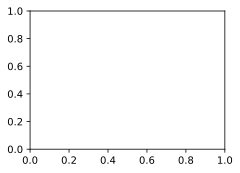

In [10]:
batch_size,lr,num_epochs = 256,0.1,10
loss = nn.CrossEntropyLoss(reduction='mean')
trainer = torch.optim.SGD(net.parameters(),lr=lr)

trainer_iter,test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net,trainer_iter,test_iter,loss,num_epochs,trainer)
d2l.plt.show()